In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
X_train = pd.read_csv("./train.csv")
y_train = X_train.pop("Survived")
X_test_orig = pd.read_csv("./test.csv")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Performing operations on train data 

In [2]:
X_train["Age"].fillna(X_train.Age.mean(), inplace=True)

In [3]:
numeric_variables = list(X_train.dtypes[X_train.dtypes!="object"].index)
X_train[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [4]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train[numeric_variables], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [5]:
model.oob_score_

0.1361695005913669

In [6]:
y_oob = model.oob_prediction_
print ("c-stat: ",roc_auc_score(y_train, y_oob))

c-stat:  0.7399551550399983


In [7]:
X_train.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [8]:
def clean_cabin(X_train):
    try:
        return X_train[0]
    except TypeError:
        return "None"
    
X_train["Cabin"] = X_train.Cabin.apply(clean_cabin)

In [9]:
categorical_variables = ["Sex", "Cabin", "Embarked"]
for variable in categorical_variables:
    X_train[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X_train[variable], prefix=variable)
    X_train = pd.concat([X_train, dummies], axis=1)
    X_train.drop([variable], axis=1, inplace=True)

In [10]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)
print ("c-stat: ",roc_auc_score(y_train, model.oob_prediction_))

c-stat:  0.8635211282608464


In [11]:
model.feature_importances_

array([9.11384671e-02, 2.38891052e-01, 4.43567267e-02, 2.15831071e-02,
       2.15047796e-01, 1.43423437e-01, 1.58822440e-01, 2.95342368e-03,
       3.79055011e-03, 6.47116172e-03, 4.30998991e-03, 8.59480266e-03,
       1.02403226e-03, 8.12054428e-04, 2.67741854e-02, 6.64265010e-05,
       1.06189189e-02, 0.00000000e+00, 6.00379221e-03, 1.53176370e-02])

Pclass                int64
Age                 float64
SibSp                 int64
Parch                 int64
Fare                float64
Sex_female            uint8
Sex_male              uint8
Cabin_A               uint8
Cabin_B               uint8
Cabin_C               uint8
Cabin_D               uint8
Cabin_E               uint8
Cabin_F               uint8
Cabin_G               uint8
Cabin_None            uint8
Cabin_T               uint8
Embarked_C            uint8
Embarked_Missing      uint8
Embarked_Q            uint8
Embarked_S            uint8
dtype: object


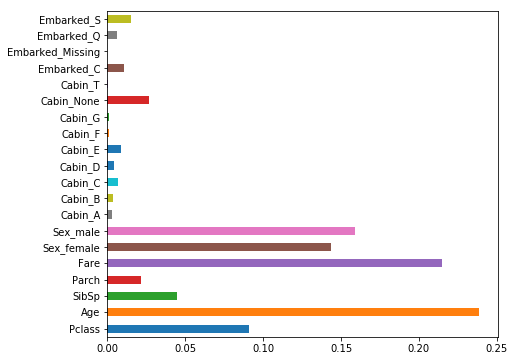

In [12]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_index()
feature_importances.plot(kind="barh", figsize=(7,6))
print(X_train.dtypes)

# Test Data

In [13]:
X_test = X_test_orig.drop(['PassengerId','Name','Ticket'], axis=1)

In [14]:
def clean_cabin(X_test):
    try:
        return X_test[0]
    except TypeError:
        return "None"
    
X_test["Cabin"] = X_test.Cabin.apply(clean_cabin)

In [15]:
categorical_variables = ["Sex", "Cabin", "Embarked"]
for variable in categorical_variables:
    X_test[variable].fillna("Missing", inplace=True)
    dummies = pd.get_dummies(X_test[variable], prefix=variable)
    X_test = pd.concat([X_test, dummies], axis=1)
    X_test.drop([variable], axis=1, inplace=True)

In [16]:
X_test["Age"].fillna(X_test.Age.mean(), inplace=True)
X_test["Fare"].fillna(X_test.Fare.mean(), inplace=True)
X_test["Cabin_T"]=0
X_test["Embarked_Missing"]=0

In [17]:
y_pred = model.predict(X_test)

In [18]:
for i in range(0, y_pred.size):
    if y_pred[i]<=0.70:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [19]:
y_pred.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
submission = pd.DataFrame({
        "PassengerId": X_test_orig["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic_data1.csv', index=False)